In [1]:
from sympy import *
import math
init_printing()

In [2]:
x=IndexedBase('x')
y=IndexedBase('y')
p=IndexedBase('p')
q=IndexedBase('q')
alpha,omega,lam=symbols('α,ω,λ')
pr,pz,r,z=symbols('p_r,p_z,r,z')
a,b,c=symbols('a,b,c')

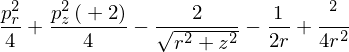

In [3]:
H=pr*pr/4+omega*omega/(4*r*r)+(alpha+2)*pz*pz/(4*alpha)-1/(2*alpha*r)-2/sqrt(r*r+z*z);H

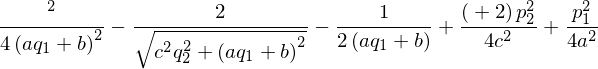

In [4]:
H.subs(r,a*q[1]+b).subs(pr,p[1]/a).subs(z,c*q[2]).subs(pz,p[2]/c)

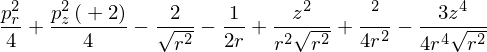

In [5]:
H_taylor=series(H,z).removeO();H_taylor

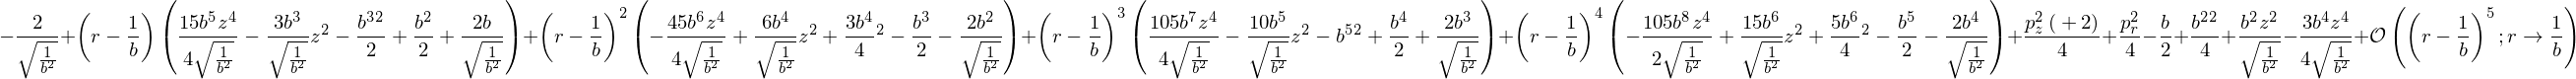

In [6]:
series(H_taylor,r,1/b,5)

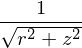

In [25]:
hoge=1/sqrt(r*r+z*z)
hoge

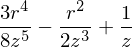

In [27]:
series(series(hoge,r).removeO(),z)

In [28]:
def mtaylor(funexpr,x,mu,order=1):

    nvars = len(x)
    hlist = ['__h' + str(i+1) for i in range(nvars)]
    command=''
    command="symbols('"+'  '.join(hlist) +"')"
    hvar = eval(command)
    #mtaylor is utaylor for specificly defined function
    t = symbols('t')
    #substitution
    loc_funexpr = funexpr
    for i in range(nvars):
        locvar = x[i]
        locsubs = mu[i]+t*hvar[i]
        loc_funexpr = loc_funexpr.subs(locvar,locsubs)
    #calculate taylorseries
    g = 0
    for i in range(order+1):
        g+=loc_funexpr.diff(t,i).subs(t,0)*t**i/math.factorial(i)

    #resubstitute
    for i in range(nvars):
        g = g.subs(hlist[i],x[i]-mu[i])

    g = g.subs(t,1)    
    return g

In [42]:
x1,x2,x3,x4,x5 = symbols('x1 x2 x3 x4 x5')
funexpr=1/(x1*x1+x2*x2)
x=[x1,x2,x3,x4,x5]
mu=[1,0,0,0,0]
mygee = mtaylor(funexpr,x,mu,order=4)

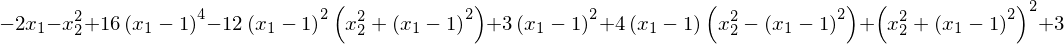

In [43]:
mygee

In [ ]:
a=omega**(3/2)*alpha/(4*alpha+1)
b=omega**2*alpha/(4*alpha+1)
c=omega**1.5*alpha**0.5*(alpha+2)**0.25/(sqrt(2)*(4*alpha+1)**0.75)